# Part 5 확률과 통계

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction


## Chapter 1 Dictionary 자료형

In [2]:
a = {'name' : '철수', 'age' : 15, 'hobby' : 'baseball'}
print (a)
print (a['name'])
print (a['age'])
print (a['hobby'])

{'name': '철수', 'age': 15, 'hobby': 'baseball'}
철수
15
baseball


### 01 dictionary에 자료 추가하기

In [3]:
a['phone'] = '01022223333'
print (a)

{'name': '철수', 'age': 15, 'hobby': 'baseball', 'phone': '01022223333'}


### 02 dictionary 자료 삭제하기

In [4]:
del a['phone']
a

{'name': '철수', 'age': 15, 'hobby': 'baseball'}

### 03 dictionary에 어떤 자료가 있는지 확인하기

In [5]:
a.keys()

dict_keys(['name', 'age', 'hobby'])

In [6]:
a.values()

dict_values(['철수', 15, 'baseball'])

In [7]:
list(a.keys())

['name', 'age', 'hobby']

In [8]:
tuple(a.values())

('철수', 15, 'baseball')

### 04 get으로 불러내기

In [9]:
a['phone']

KeyError: 'phone'

In [13]:
a.get('phone')

In [14]:
a.get('phone') == None

True

In [15]:
a.get('age')

15

### 05 key 값이 존재하는지 찾기

In [16]:
'age' in a

True

In [17]:
'phone' in a

False

## Chapter 2 도수분포표

In [19]:
import pandas as pd

In [24]:
weight = (22, 24, 26, 30, 32, 40, 35, 45, 20, 29, 34, 36, 36, 38, 39, 48, 43, 37, 33, 31, 29, 39, 26, 29)

In [25]:
hist = np.zeros(6)
for i in weight:
    if i//5 == 4:
        hist[0] += 1
    elif i//5 == 5:
        hist[1] += 1
    elif i//5 == 6:
        hist[2] += 1
    elif i//5 == 7:
        hist[3] += 1
    elif i//5 == 8:
        hist[4] += 1
    elif i//5 == 9:
        hist[5] += 1
print(hist)

[3. 5. 5. 7. 2. 2.]


### 01 pandas Series 사용하기

In [26]:
index = ['20~25', '25~30', '30~35', '35~40', '40~45', '45~50']
a = pd.Series(hist, index = index)
a

20~25    3.0
25~30    5.0
30~35    5.0
35~40    7.0
40~45    2.0
45~50    2.0
dtype: float64

In [27]:
type(a)

pandas.core.series.Series

In [28]:
index = np.array([20, 25, 30, 35, 40, 45]) + 2.5
b = pd.Series(hist, index = index)
b

22.5    3.0
27.5    5.0
32.5    5.0
37.5    7.0
42.5    2.0
47.5    2.0
dtype: float64

In [32]:
index = np.array([20, 25, 30, 35, 40, 45]) + 2.5
b = pd.Series(hist, index = index, dtype = int)
b

22.5    3
27.5    5
32.5    5
37.5    7
42.5    2
47.5    2
dtype: int64

In [33]:
b.name = 'A반의 체중 도수분포표'
b

22.5    3
27.5    5
32.5    5
37.5    7
42.5    2
47.5    2
Name: A반의 체중 도수분포표, dtype: int64

#### Series의 index 거꾸로 찾기

In [35]:
print(a.index)
print(b.index)

Index(['20~25', '25~30', '30~35', '35~40', '40~45', '45~50'], dtype='object')
Float64Index([22.5, 27.5, 32.5, 37.5, 42.5, 47.5], dtype='float64')


#### Series 연산하기

In [41]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.291461
b   -0.248114
c    0.383348
d   -0.531965
e   -2.178187
dtype: float64

In [42]:
s + s

a   -0.582922
b   -0.496228
c    0.766697
d   -1.063930
e   -4.356373
dtype: float64

In [45]:
s * 2

a   -0.582922
b   -0.496228
c    0.766697
d   -1.063930
e   -4.356373
dtype: float64

In [47]:
s**2

a    0.084950
b    0.061561
c    0.146956
d    0.282987
e    4.744497
dtype: float64

#### dictionary로부터 Series 만들기

In [48]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
f = pd.Series(d)
f

a    0.0
b    1.0
c    2.0
dtype: float64

#### Series의 indexing로 값 불러오기

In [49]:
print(f[0])

0.0


In [50]:
print(f[:])

a    0.0
b    1.0
c    2.0
dtype: float64


In [51]:
f['a']

0.0

In [52]:
'b'in f

True

In [53]:
'd'in f

False

In [54]:
f['d']

KeyError: 'd'

In [55]:
f.get('a')

0.0

In [56]:
f.get('d')

## pandas의 DataFrame 사용하기

In [57]:
len(weight)

24

In [58]:
weight

(22,
 24,
 26,
 30,
 32,
 40,
 35,
 45,
 20,
 29,
 34,
 36,
 36,
 38,
 39,
 48,
 43,
 37,
 33,
 31,
 29,
 39,
 26,
 29)

In [59]:
height = [124, 125, 128, 130, 134, 140, 131, 143, 122, 129, 136, 139, 141, 135, 142, 150, 149, 141, 127, 131, 130, 125, 135, 126]


In [60]:
d = {'weight' : pd.Series(weight), \
     'height' : pd.Series(height)}

In [61]:
e = pd.DataFrame(d)
e

,weight,height
0,22,124
1,24,125
2,26,128
3,30,130
4,32,134
5,40,140
6,35,131
7,45,143
8,20,122
9,29,129


In [62]:
f = np.zeros((len(weight), 2))
f[:,0] = weight
f[:,1] = height
g = pd.DataFrame(f, columns = ['weight', 'height'])
g

,weight,height
0,22.0,124.0
1,24.0,125.0
2,26.0,128.0
3,30.0,130.0
4,32.0,134.0
5,40.0,140.0
6,35.0,131.0
7,45.0,143.0
8,20.0,122.0
9,29.0,129.0


In [63]:
g.name = 'A반의 몸무게와 키'
g.name

'A반의 몸무게와 키'

#### DataFrame의 자료 불러오기

In [64]:
e['weight']

0     22
1     24
2     26
3     30
4     32
5     40
6     35
7     45
8     20
9     29
10    34
11    36
12    36
13    38
14    39
15    48
16    43
17    37
18    33
19    31
20    29
21    39
22    26
23    29
Name: weight, dtype: int64

#### loc, iloc 사용하기

In [68]:
weight = [34, 36, 75]
height = [144, 151,178]
wh = zip(weight, height)
index = ['철수', '영희', '선생님']
h = pd.DataFrame(wh, index = index, columns = ['몸무게', '키'])
h

,몸무게,키
철수,34,144
영희,36,151
선생님,75,178


In [69]:
h.loc['철수']

몸무게     34
키      144
Name: 철수, dtype: int64

In [70]:
h.iloc[0]

몸무게     34
키      144
Name: 철수, dtype: int64

#### DataFrame의 index와 columns 찾기

In [71]:
h.columns

Index(['몸무게', '키'], dtype='object')

In [72]:
h.index

Index(['철수', '영희', '선생님'], dtype='object')

## Chapter 3 numpy의 히스토그램으로 도수분포도 

In [75]:
weight = (22, 24, 26, 30, 32, 40, 35, 45, 20, 29, 34, 36, 36, 38, 39, 48, 43, 37, 33, 31, 29, 39, 26, 29)
bins = np.arange(20,55,5)  # 도수분포구간
hist, bins = np.histogram(weight, bins)
print(hist)
print(bins)

[3 5 5 7 2 2]
[20 25 30 35 40 45 50]


#### 상대도수 구하기

In [78]:
total_number = len(weight)

In [80]:
hist

array([3, 5, 5, 7, 2, 2])

In [82]:
bins

array([20, 25, 30, 35, 40, 45, 50])

In [83]:
hist_normal = np.asarray(hist)/total_number

print(hist_normal)

[0.125      0.20833333 0.20833333 0.29166667 0.08333333 0.08333333]


In [84]:
sum_hist_normal = sum(hist_normal)
print (sum_hist_normal)

1.0000000000000002


#### 누적도수 구하기

In [85]:
accumul_weight = []
previous = 0
for i in hist:
    previous += i
    accumul_weight.append(previous)
print(accumul_weight)

[3, 8, 13, 20, 22, 24]


### 02 히스토그램 그리기

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text yticklabel objects>)

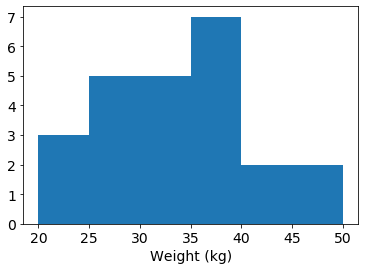

In [86]:
plt.hist(weight, bins)
plt.xlabel('Weight (kg)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text yticklabel objects>)

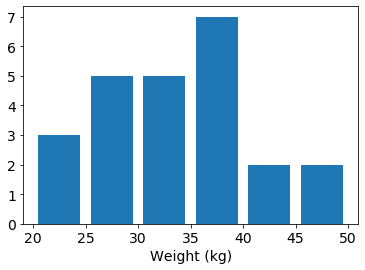

In [88]:
plt.hist(weight, bins, rwidth = 0.8)
plt.xlabel('Weight (kg)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text yticklabel objects>)

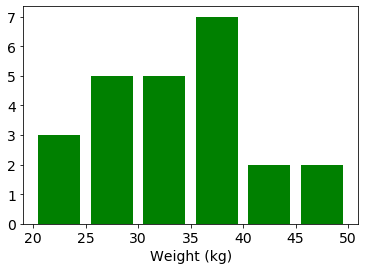

In [90]:
plt.hist(weight, bins, rwidth = 0.8, color = 'green')
plt.xlabel('Weight (kg)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text yticklabel objects>)

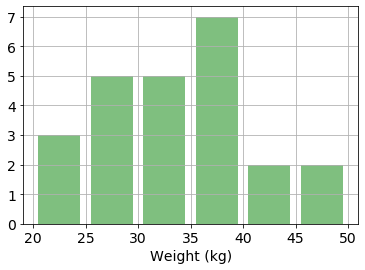

In [91]:
plt.hist(weight, bins, rwidth = 0.8, color = 'green', alpha = 0.5)
plt.grid()
plt.xlabel('Weight (kg)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

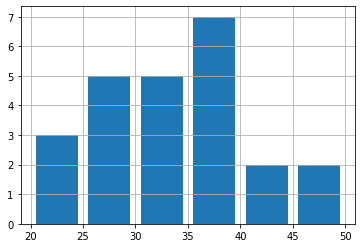

In [92]:
plt.bar(b.index, hist, width = 4)
plt.grid()

In [97]:
weight2 = (42, 43, 46, 50, 48, 40, 38, 46, 50, 52, 54, 58, 46, 48, 51, 52, 56, 60, 39, 61, 52, 45, 44, 45)

In [96]:
bins2 = np.arange(20,65,5)  # 도수분포구간
hist2, bin_edges = np.histogram(weight2, bins2)
print (hist2)

[0 0 0 2 4 7 7 3]


(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text yticklabel objects>)

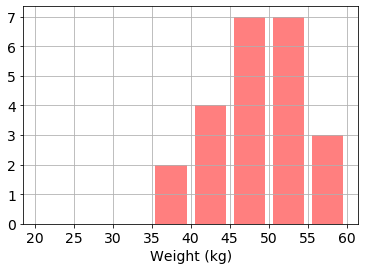

In [98]:
plt.hist(weight2, bins2, rwidth = 0.8, color = 'red', alpha = 0.5)
plt.grid()
plt.xlabel('Weight (kg)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(0, 9)

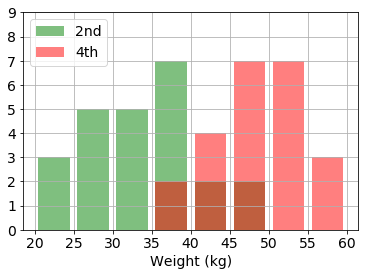

In [99]:
plt.hist(weight, bins, rwidth = 0.8, color = 'green', alpha = 0.5, label = '2nd')
plt.hist(weight2, bins2, rwidth = 0.8, color = 'red', alpha = 0.5, label = '4th')
plt.grid()
plt.xlabel('Weight (kg)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)
plt.ylim([0,9])

#### 계급 값 구하기

In [100]:
print (bins)

[20 25 30 35 40 45 50]


In [102]:
size_bins = (bins[1]-bins[0])/2
bins_mean = bins[:-1]+size_bins
print(bins_mean)

[22.5 27.5 32.5 37.5 42.5 47.5]


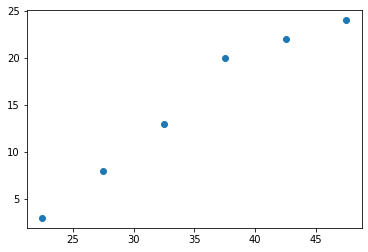

In [103]:
plt.scatter(bins_mean, accumul_weight)

#### 구간별 평균 구하기

In [104]:
bins_average = np.multiply(np.array(hist), np.array(bins_mean))
print(bins_average)

[ 67.5 137.5 162.5 262.5  85.   95. ]


In [106]:
average = sum(bins_average)/total_number
print(average)

33.75


In [107]:
np.mean(weight)

33.375

#### Question 5.1

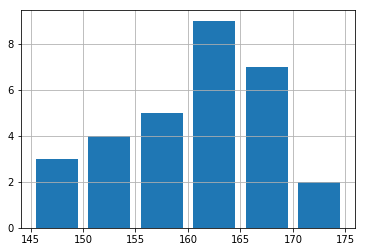

In [91]:
height = [3,4,5,9,7,2]
bin = np.array([145,150,155,160,165,170]) + 2.5
plt.bar(bin, height, width = 4)
plt.grid()

In [92]:
(3+4+5) / (sum(height)) * 100

40.0

## Chapter 4 경우의 수 

### 01 경우의 수 찾기

In [93]:
import itertools

#### 순서는 중요하고, 중복은 허용 안 될 때

In [94]:
event = list(itertools.permutations(range(1,6), 2))
event

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4)]

In [95]:
len(event)

20

#### 순서는 중요하고, 중복은 허용될 때

In [96]:
event = list(itertools.product([1,2,3,4,5,6], [1,2,3,4,5,6]))

In [97]:
len(event)

36

#### 순서는 중요하지 않고, 중복은 허용 안 될 때

In [98]:
list(itertools.combinations([1,2,3,4], 2))

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

#### 순서는 중요하지 않고, 중복은 허용될 때

In [99]:
list(itertools.combinations_with_replacement([1,2,3,4], 2))

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 3),
 (3, 4),
 (4, 4)]

### 02 확률 구하기

주사위를 두번 던져 합이 소수가 나올 경우의 수 및 확률을 구하시오.

먼저 소수판별기 코딩함수를 불러올까요?

In [100]:
def is_prime2(a):
    b = range(2, a)  #2부터 a-1까지의 list
    c = 0
    for i in b:    
        if a % i == 0:  
            c += 1   
    if c > 0:
        d = False   
    else:
        d = True
    return d

In [101]:
add_prime = []
for i in range(1,7):
    for j in range(1,7):
        if is_prime2(i + j):
            add_prime.append((i,j))
print (add_prime)

[(1, 1), (1, 2), (1, 4), (1, 6), (2, 1), (2, 3), (2, 5), (3, 2), (3, 4), (4, 1), (4, 3), (5, 2), (5, 6), (6, 1), (6, 5)]


In [102]:
n = len(add_prime)
p = Fraction(n,36)
print (n)
print (p)

15
5/12


In [103]:
total = list(itertools.product([1,2,3,4,5,6], [1,2,3,4,5,6])) 
a = [i for i in total if is_prime2(sum(i))]
a

[(1, 1),
 (1, 2),
 (1, 4),
 (1, 6),
 (2, 1),
 (2, 3),
 (2, 5),
 (3, 2),
 (3, 4),
 (4, 1),
 (4, 3),
 (5, 2),
 (5, 6),
 (6, 1),
 (6, 5)]

In [104]:
Fraction(len(a), len(total))

Fraction(5, 12)

#### Question 5.2


In [105]:
def factorization(a):
    b = range(1, a)   
    factors = []
    for i in b:
        if a % i == 0:
            factors.append(i)
    factors.append(a)
    return factors

In [106]:
complete_number = []
for i in np.arange(1,2001):
    factors = factorization(i)
    del factors[-1]
    if sum(factors) == i:
        complete_number.append(i)
print (complete_number)

[6, 28, 496]


#### Question 5.3

3의 배수는 3~999
5의 배수는 5~995

그 중 3과 5의 공배수를 빼야겠죠, 즉 15의 공배수를 빼면 됩니다.

In [107]:
x = np.arange(3,1000,3)
y = np.arange(5, 1000, 5)
z = np.arange(15,1000,15)
total = sum(x) + sum(y) - sum(z)
print(total)

233168


#### Question 5.4

In [108]:
total = []  # 금액 합계의 list

a500 = np.arange(0,1600,500)
a100 = np.arange(0,800,100)
a50 = np.arange(0,110,50)
a10 = np.arange(0,70,10)

print (a500, a100, a50, a10)

[   0  500 1000 1500] [  0 100 200 300 400 500 600 700] [  0  50 100] [ 0 10 20 30 40 50 60]


In [109]:
total = list(itertools.product(a500, a100, a50, a10))
event = []
for i in total:
    if sum(i) not in event:
        event.append(sum(i))
len(event)

237

#### Questions 5.5

In [110]:
count = 0
for i in list(itertools.permutations([1,2,3,4,5],5)):
    loc_1 = i.index(1)
    loc_2 = i.index(2)
    loc_3 = i.index(3)
    if (loc_1 < loc_2) and (loc_3 > loc_2):
        count += 1
print (count)

20


#### Question 5.6

In [111]:
x = ['x']*15
o = ['o']*5

n = len(list(itertools.permutations(x+o,3)))
count_no_o = 0
cpunt_one_o = 0
for i in list(itertools.permutations(x+o,3)):
    if 'o' not in i:
        count_no_o += 1
print ('3개 모두 당첨제비가 아닐 확률 : {}'.format(count_no_o/n))
print ('적어도 1개가 당첨제비일 확률 : {}'.format(1-count_no_o/n))

3개 모두 당첨제비가 아닐 확률 : 0.3991228070175439
적어도 1개가 당첨제비일 확률 : 0.6008771929824561


In [112]:
91/228

0.3991228070175439

#### Question 5.7

In [113]:
p = 1/(45*44*43*42*41*40)
print (p)

1.7051917222081714e-10


#### Question 5.8

In [114]:
total = list(itertools.product(range(1,7), range(1,7), range(1,7), range(1,7), range(1,7)))
sum5 = 0
for i in total:
    if sum(i) == 15:
        sum5 +=1
sum5

651

#### Question 5.9

In [116]:
event = list(itertools.combinations([0,0,1,1,1,2,2,3,4,5], 3))
len(event)

120

곱이 1이 될 확율은 1,1,1을 뽑아야 하니 1/120

곱이 2 이상일 경우의 수는 1,1,1,2,2,3,4,5에서 3장을 뽑을 경우의 수 - 1 (1,1,1이 나올 확율)

In [117]:
event2 = list(itertools.combinations([1,1,1,2,2,3,4,5], 3))
len(event2)

56

따라서 55/120 = 11/24

#### Question 5.10

다른 크기의 주사위니깐 순서가 중요하고, 중복 가능 product를 써야 함.

그리고 이때 총 경우의 수는 36

In [118]:
event1 = 0
event2 = 0
event3 = 0
for x in range(1,7):
    for y in range(1,7):
        if x+y <= 6:
            event1 += 1
        if x-y == 3:
            event2 += 1
        if (y == x-2) and (y > -x + 7):
            event3 += 1
print (event1, event2, event3)

15 3 2


따라서 (1) 15/36, (2) 3/36 = 1/12, (3) 2/36 = 1/18

### 03 기대 값 구하기

## Chapter 5 통계

### 01 numpy의 average로 평균 구하기

In [119]:
x = 2,6,6,8,8,10
length = len(x)
average = sum(x)/length
print (average)

6.666666666666667


In [120]:
def average(x):
    return sum(x)/len(x)

In [121]:
average(x)

6.666666666666667

In [122]:
average2 = lambda a:sum(a)/len(a)

In [123]:
average2(x)

6.666666666666667

In [124]:
np.average(x)

6.666666666666667

### 02 numpy의 median으로 중앙 값 찾기

In [437]:
x = [9,3,5,2,7,2,6,6,7,7,8,8,10]

In [438]:
x.sort()
x

[2, 2, 3, 5, 6, 6, 7, 7, 7, 8, 8, 9, 10]

In [125]:
n = len(x)
middle_number = n//2

print ('원소갯수 : {}'.format(n))
print ('중앙은 {} 번째 원소'.format(middle_number))
print ('그래서 중앙값은 {}'.format(x[middle_number]))

원소갯수 : 6
중앙은 3 번째 원소
그래서 중앙값은 8


In [126]:
np.median(x)

7.0

### 03 numpy의 bincount와 argmax로 최빈값 찾기

In [127]:
np.bincount(x).argmax()

6

In [128]:
x = [9,3,5,2,7,2,6,6,7,7,8,8,10]
frequency = {}
max_n = 0
for i in x:
    frequency[i] = x.count(i)  # 일단 숫자별로 count를 합니다.

for j in frequency:
    print (j,frequency[j])
    if frequency[j] > max_n:
        max_n = frequency[j]
        max_key = j
print ('최빈수는 {}'.format(max_key))

9 1
3 1
5 1
2 2
7 3
6 2
8 2
10 1
최빈수는 7


In [129]:
np.bincount(x)

array([0, 0, 2, 1, 0, 1, 2, 3, 2, 1, 1], dtype=int64)

In [130]:
np.bincount(x).argmax()

7

### 04 numpy의 var와 std로 분산과 표준편차 구하기

In [131]:
x = 0, 1, 3, 6, 12, 13, 10, 7, 5, 1

In [132]:
mean = np.average(x)
print(mean)

5.8


In [133]:
variance = 0
for i in range(len(x)):
    variance += (x[i]-mean)**2
variance /= len(x)
std= np.sqrt(variance)

print ('분산 : {}'.format(variance))
print ('표준편차 : {}'.format(std))

분산 : 19.759999999999998
표준편차 : 4.445222154178573


In [134]:
np.var(x)

19.759999999999998

In [135]:
np.std(x)

4.445222154178573

#### Question 5.11

$4 + 10 + x + y + 5 = 30 \quad \cdots (eq.1) $  

$(4-6)^2 + (10-6)^2 + (x-6)^2 + (y-6)^2 + (5-6)^2 = 4.4 \times 5 \quad \cdots (eq.1) $

(eq.1) 을 정리하면

$ x + y = 11$

(eq.2)를 정리하면

$ x^2 + y^2 - 12(x+y) + 71 = 0 $

$ x^2 + y^2 = 61 $

#### Question 5.12

In [136]:
x = np.arange(1,7)
y = np.arange(1,7)

x_minus_y = []
for i in x:
    for j in y:
        x_minus_y.append(i-j)
print (np.var(x_minus_y))

5.833333333333333


#### Question 5.13

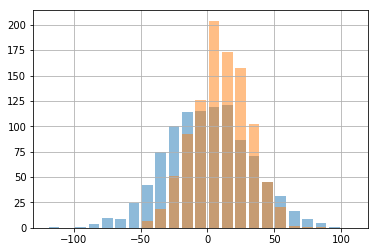

In [137]:
bin = np.arange(-120, 120, 10)
hist1 = np.random.normal(0, 30, 1000)
hist2 = np.random.normal(10, 20, 1000)
plt.hist(hist1, bin, alpha = 0.5, rwidth = 0.8)
plt.hist(hist2, bin, alpha = 0.5, rwidth = 0.8)
plt.grid()

평균은 주황색이 크고, 표준편차는 파란색이 크다.

## Chapter 6 데이터 분석 - 2018 월드컵
### 01 2018 월드컵 데이터 분석하기
### 02 CSV 파일 불러오기

In [138]:
import pandas as pd

In [146]:
df = pd.read_csv('C:/Users/FIFA 2018 Statistics.csv')

In [147]:
df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,...,3,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,...,1,0,0,No,4.0,Group Stage,No,0,NaN,NaN
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,...,1,0,0,Yes,24.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,...,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,...,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0


In [148]:
type(df)

pandas.core.frame.DataFrame

In [149]:
df.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [150]:
df.columns[1]

'Team'

In [151]:
df.index

RangeIndex(start=0, stop=128, step=1)

In [152]:
df[:3]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN


In [153]:
df.head(4)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN


In [154]:
df.tail()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0
127,15-07-2018,Croatia,France,2,61,15,3,8,4,6,...,1,0,0,No,28.0,Final,No,0,NaN,NaN


In [155]:
df['Team']

0              Russia
1        Saudi Arabia
2               Egypt
3             Uruguay
4             Morocco
5                Iran
6            Portugal
7               Spain
8              France
9           Australia
10          Argentina
11            Iceland
12               Peru
13            Denmark
14            Croatia
15            Nigeria
16         Costa Rica
17             Serbia
18            Germany
19             Mexico
20             Brazil
21        Switzerland
22             Sweden
23     Korea Republic
24            Belgium
25             Panama
26            Tunisia
27            England
28           Colombia
29              Japan
            ...      
98            Uruguay
99           Portugal
100             Spain
101            Russia
102           Croatia
103           Denmark
104            Brazil
105            Mexico
106           Belgium
107             Japan
108            Sweden
109       Switzerland
110          Colombia
111           England
112       

In [156]:
df['Goal Scored'].sum()

169

In [157]:
df['Goal Scored'].mean()

1.3203125

In [158]:
df['Goal Scored'].std()

1.156519307858204

In [159]:
df.set_index('Team')

,Date,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Team,,,,,,,,,,,,,,,,,,,,,
Russia,14-06-2018,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
Saudi Arabia,14-06-2018,Russia,0,60,6,0,3,3,2,1,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
Egypt,15-06-2018,Uruguay,0,43,8,3,3,2,0,1,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
Uruguay,15-06-2018,Egypt,1,57,14,4,6,4,5,1,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
Morocco,15-06-2018,Iran,0,64,13,3,6,4,5,0,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
Iran,15-06-2018,Morocco,1,36,8,2,5,1,2,0,...,3,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
Portugal,15-06-2018,Spain,3,39,8,3,2,3,4,1,...,1,0,0,No,4.0,Group Stage,No,0,NaN,NaN
Spain,15-06-2018,Portugal,3,61,12,5,5,2,5,3,...,1,0,0,Yes,24.0,Group Stage,No,0,NaN,NaN
France,16-06-2018,Australia,2,51,12,5,4,3,5,0,...,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN


In [160]:
df.set_index('Team').loc['Korea Republic']

,Date,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Team,,,,,,,,,,,,,,,,,,,,,
Korea Republic,18-06-2018,Sweden,0,48,5,0,2,3,5,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
Korea Republic,23-06-2018,Mexico,1,41,17,6,2,9,7,0,...,4,0,0,No,90.0,Group Stage,No,0,NaN,NaN
Korea Republic,27-06-2018,Germany,2,30,11,5,5,1,3,0,...,4,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN


In [161]:
df.set_index('Team').loc['Korea Republic'].mean()

Goal Scored                 1.000000
Ball Possession %          39.666667
Attempts                   11.000000
On-Target                   3.666667
Off-Target                  3.000000
Blocked                     4.333333
Corners                     5.000000
Offsides                    0.000000
Free Kicks                 12.000000
Saves                       4.333333
Pass Accuracy %            78.333333
Passes                    311.333333
Distance Covered (Kms)    106.666667
Fouls Committed            21.000000
Yellow Card                 3.333333
Yellow & Red                0.000000
Red                         0.000000
1st Goal                   90.000000
Goals in PSO                0.000000
Own goals                        NaN
Own goal Time                    NaN
dtype: float64

In [162]:
df.set_index('Team').loc['Korea Republic'].std()

Goal Scored                1.000000
Ball Possession %          9.073772
Attempts                   6.000000
On-Target                  3.214550
Off-Target                 1.732051
Blocked                    4.163332
Corners                    2.000000
Offsides                   0.000000
Free Kicks                 7.810250
Saves                      2.309401
Pass Accuracy %            4.041452
Passes                    64.423081
Distance Covered (Kms)    10.016653
Fouls Committed            4.358899
Yellow Card                1.154701
Yellow & Red               0.000000
Red                        0.000000
1st Goal                   0.000000
Goals in PSO               0.000000
Own goals                       NaN
Own goal Time                   NaN
dtype: float64

### 03 국가별 정리하기

In [163]:
team_list = df.set_index('Team').index
team_list

Index(['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Morocco', 'Iran',
       'Portugal', 'Spain', 'France', 'Australia',
       ...
       'Russia', 'Croatia', 'France', 'Belgium', 'Croatia', 'England',
       'Belgium', 'England', 'France', 'Croatia'],
      dtype='object', name='Team', length=128)

In [164]:
team = []
for i in team_list:
    if i not in team:
        team.append(i)
team

['Russia',
 'Saudi Arabia',
 'Egypt',
 'Uruguay',
 'Morocco',
 'Iran',
 'Portugal',
 'Spain',
 'France',
 'Australia',
 'Argentina',
 'Iceland',
 'Peru',
 'Denmark',
 'Croatia',
 'Nigeria',
 'Costa Rica',
 'Serbia',
 'Germany',
 'Mexico',
 'Brazil',
 'Switzerland',
 'Sweden',
 'Korea Republic',
 'Belgium',
 'Panama',
 'Tunisia',
 'England',
 'Colombia',
 'Japan',
 'Poland',
 'Senegal']

In [165]:
team_summary = {}
for i in range(len(team)):
    team_summary[team[i]] = df.set_index('Team').loc[team[i]].mean()

In [166]:
team_summary['Korea Republic']

Goal Scored                 1.000000
Ball Possession %          39.666667
Attempts                   11.000000
On-Target                   3.666667
Off-Target                  3.000000
Blocked                     4.333333
Corners                     5.000000
Offsides                    0.000000
Free Kicks                 12.000000
Saves                       4.333333
Pass Accuracy %            78.333333
Passes                    311.333333
Distance Covered (Kms)    106.666667
Fouls Committed            21.000000
Yellow Card                 3.333333
Yellow & Red                0.000000
Red                         0.000000
1st Goal                   90.000000
Goals in PSO                0.000000
Own goals                        NaN
Own goal Time                    NaN
dtype: float64

In [167]:
team_summary['France']

Goal Scored                 2.000000
Ball Possession %          47.857143
Attempts                   11.714286
On-Target                   4.285714
Off-Target                  5.142857
Blocked                     2.285714
Corners                     3.000000
Offsides                    0.428571
Free Kicks                 15.714286
Saves                       1.857143
Pass Accuracy %            82.428571
Passes                    435.142857
Distance Covered (Kms)    101.000000
Fouls Committed            13.285714
Yellow Card                 1.714286
Yellow & Red                0.000000
Red                         0.000000
1st Goal                   35.666667
Goals in PSO                0.000000
Own goals                   1.000000
Own goal Time              18.000000
dtype: float64

나라들 중 가장 파울을 많이 범한 나라를 찾아볼까요?

In [168]:
team_summary['Korea Republic'][13]

21.0

In [169]:
fouls = {}
goals = {}
possession = {}
distance = {}
yellow_and_red = {}
pass_accuracy = {}

for i in range(len(team)):
    fouls[team[i]] = team_summary[team[i]][13]   
    goals[team[i]] = team_summary[team[i]][0]    
    possession[team[i]] = team_summary[team[i]][1]  
    pass_accuracy[team[i]] = team_summary[team[i]][9]    
    distance[team[i]] = team_summary[team[i]][11]    
    yellow_and_red[team[i]] = team_summary[team[i]][15]    

fouls

{'Russia': 19.0,
 'Saudi Arabia': 10.0,
 'Egypt': 12.666666666666666,
 'Uruguay': 12.6,
 'Morocco': 20.666666666666668,
 'Iran': 14.666666666666666,
 'Portugal': 13.75,
 'Spain': 8.5,
 'France': 13.285714285714286,
 'Australia': 12.333333333333334,
 'Argentina': 13.75,
 'Iceland': 11.666666666666666,
 'Peru': 12.333333333333334,
 'Denmark': 13.5,
 'Croatia': 16.285714285714285,
 'Nigeria': 15.0,
 'Costa Rica': 14.333333333333334,
 'Serbia': 15.0,
 'Germany': 9.666666666666666,
 'Mexico': 13.5,
 'Brazil': 10.0,
 'Switzerland': 13.25,
 'Sweden': 13.0,
 'Korea Republic': 21.0,
 'Belgium': 14.142857142857142,
 'Panama': 16.333333333333332,
 'Tunisia': 15.333333333333334,
 'England': 10.285714285714286,
 'Colombia': 15.75,
 'Japan': 9.25,
 'Poland': 10.333333333333334,
 'Senegal': 14.666666666666666}

In [170]:
max(fouls, key=fouls.get)

'Korea Republic'

In [171]:
print ('가장 골 많이 넣은 나라 : {}'.format(max(goals, key=goals.get)))
print ('가장 점유율 높은 나라 : {}'.format(max(possession, key=possession.get)))
print ('가장 패스 정확도 높은 나라 : {}'.format(max(pass_accuracy, key=pass_accuracy.get)))
print ('가장 뛴거리가 많은 나라 : {}'.format(max(distance, key=distance.get)))
print ('가장 경고 & 퇴장 많이 받은 나라 : {}'.format(max(yellow_and_red, key=yellow_and_red.get)))

가장 골 많이 넣은 나라 : Belgium
가장 점유율 높은 나라 : Spain
가장 패스 정확도 높은 나라 : Mexico
가장 뛴거리가 많은 나라 : Spain
가장 경고 & 퇴장 많이 받은 나라 : Germany


In [172]:
score = {}
for i in range(len(team)):
    score[team[i]] = team_summary[team[i]][0]*2 + team_summary[team[i]][1]*0.1 + team_summary[team[i]][9]*0.15 \
                     + team_summary[team[i]][11]*0.005 - team_summary[team[i]][15]

In [173]:
score

{'Russia': 10.254000000000001,
 'Saudi Arabia': 10.31,
 'Egypt': 8.266666666666666,
 'Uruguay': 10.143,
 'Morocco': 8.41,
 'Iran': 6.014999999999999,
 'Portugal': 11.11875,
 'Spain': 14.676250000000001,
 'France': 11.239999999999998,
 'Australia': 9.375,
 'Argentina': 12.51875,
 'Iceland': 6.823333333333333,
 'Peru': 9.09,
 'Denmark': 8.8675,
 'Croatia': 12.732857142857146,
 'Nigeria': 8.741666666666667,
 'Costa Rica': 7.711666666666667,
 'Serbia': 8.313333333333334,
 'Germany': 11.605,
 'Mexico': 9.95875,
 'Brazil': 11.749000000000002,
 'Switzerland': 11.395000000000001,
 'Sweden': 8.142,
 'Korea Republic': 8.173333333333334,
 'Belgium': 13.034285714285716,
 'Panama': 7.298333333333334,
 'Tunisia': 11.565000000000001,
 'England': 11.90857142857143,
 'Colombia': 10.66625,
 'Japan': 11.330000000000002,
 'Poland': 8.863333333333333,
 'Senegal': 8.895}

In [174]:
print ('가장 아름다운 축구를 한 나라 : {}'.format(max(score, key=score.get)))
print ('가장 안아름다운 축구를 한 나라 : {}'.format(min(score, key=score.get)))

가장 아름다운 축구를 한 나라 : Spain
가장 안아름다운 축구를 한 나라 : Iran
